In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/subashree188/Student_Percentage_Predictor/main/StudyHours.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


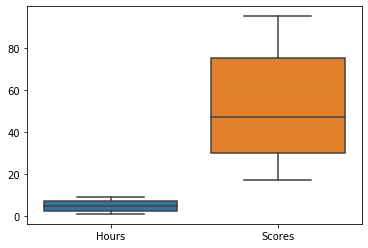

In [4]:
sns.boxplot(data=df)

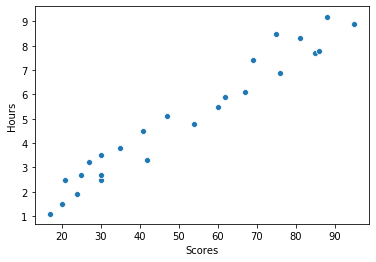

In [5]:
sns.scatterplot(x='Scores',y='Hours',data=df)

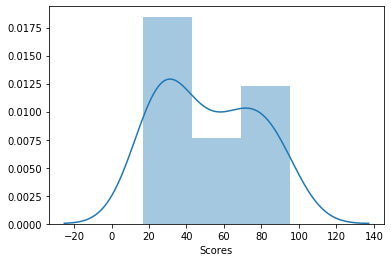

In [6]:
sns.distplot(a=df.Scores)

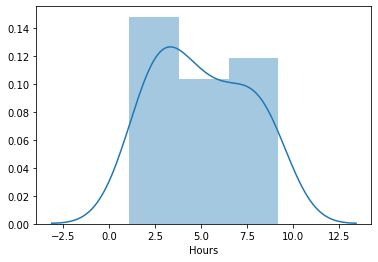

In [7]:
sns.distplot(a=df.Hours)

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regression=LinearRegression()

In [13]:
regression.fit(X_train,y_train)
print("Training completed successfully!!!!")

Training completed successfully!!!!


In [14]:
m=regression.coef_
c=regression.intercept_

In [15]:
line=m*X+c

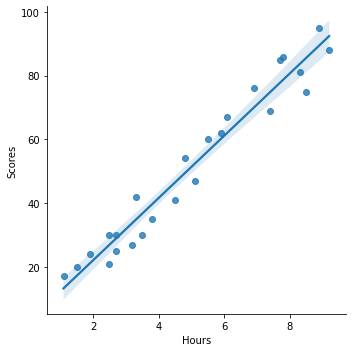

In [16]:
sns.lmplot(x='Hours',y='Scores',data=df)

<function matplotlib.pyplot.show(*args, **kw)>

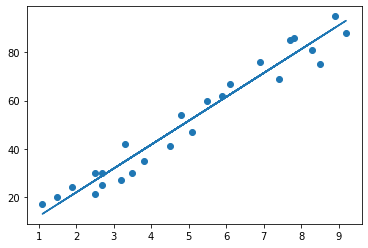

In [17]:
plt.scatter(X,y)
plt.plot(X,line)
plt.show

In [18]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
y_pred=regression.predict(X_test)

In [20]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [21]:
data = pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
hours=float(input('Enter the number of hours you study'))
score_predict=regression.predict([[hours]])
print("You will score:",score_predict[0])

Enter the number of hours you study5
You will score: 51.57144244464587


In [23]:
from sklearn import metrics

In [24]:
print('Root mean square error:',metrics.mean_absolute_error(y_test, y_pred))

Root mean square error: 4.183859899002975
